# **Part 1: Building up a basic predictive model**

## **Task 1: Data Cleaning and Transformation**

### **Step 1: Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np

### **Step 2: Load the dataset**

In [2]:
df = pd.read_csv("Dataset.csv", low_memory=False)
print("Step 2: Initial dataset shape:", df.shape)

Step 2: Initial dataset shape: (200031, 22)


### **Step 3: Remove irrelevant columns**

In [3]:
# Justification: 'index' is a redundant identifier, 'USMER' and 'MEDICAL_UNIT' are administrative and not directly related to ICU prediction
df = df.drop(columns=['index', 'PATIENT_TYPE', 'USMER', 'MEDICAL_UNIT', 'DATE_DIED'])
print("Step 3: Shape after dropping irrelevant columns:", df.shape)

Step 3: Shape after dropping irrelevant columns: (200031, 17)


### **Step 4: Identify and handle missing values**

In [4]:
# Replacing '?' with NaN to standardize missing values
df.replace('?', np.nan, inplace=True)
print("Step 4: Missing values before handling:\n", df.isnull().sum())

# Handlling 'PREGNANT' for males (SEX = 2, not pregnant = 2)
df.loc[df['SEX'] == 2, 'PREGNANT'] = 2
print("Step 4: Missing values in 'PREGNANT' after handling males:", df['PREGNANT'].isnull().sum())

Step 4: Missing values before handling:
 SEX                          0
INTUBED                   7325
PNEUMONIA                 5144
AGE                          0
PREGNANT                118792
DIABETES                  1195
COPD                      1064
ASTHMA                    1066
INMSUPR                   1280
HIPERTENSION              1106
OTHER_DISEASE             2074
CARDIOVASCULAR            1143
OBESITY                   1113
RENAL_CHRONIC             1074
TOBACCO                   1126
CLASIFFICATION_FINAL         0
ICU                       7488
dtype: int64
Step 4: Missing values in 'PREGNANT' after handling males: 487


### **Step 5: Verify and adjust data types**

In [5]:
binary_cols = ['SEX', 'INTUBED', 'PNEUMONIA', 'PREGNANT', 'DIABETES',
               'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE',
               'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'ICU']
for col in binary_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')

df['AGE'] = pd.to_numeric(df['AGE'], errors='coerce')
df['CLASIFFICATION_FINAL'] = pd.to_numeric(df['CLASIFFICATION_FINAL'], errors='coerce')
print("Step 5: Data types after conversion:\n", df.dtypes)

Step 5: Data types after conversion:
 SEX                     Int64
INTUBED                 Int64
PNEUMONIA               Int64
AGE                     int64
PREGNANT                Int64
DIABETES                Int64
COPD                    Int64
ASTHMA                  Int64
INMSUPR                 Int64
HIPERTENSION            Int64
OTHER_DISEASE           Int64
CARDIOVASCULAR          Int64
OBESITY                 Int64
RENAL_CHRONIC           Int64
TOBACCO                 Int64
CLASIFFICATION_FINAL    int64
ICU                     Int64
dtype: object


### **Step 6: Validate binary columns (should only contain 1, 2, or NaN)**

In [6]:
for col in binary_cols:
    invalid_values = df[col].dropna().isin([1, 2]).eq(False).sum()
    if invalid_values > 0:
        print(f"Step 6: Warning: {col} contains {invalid_values} invalid values outside [1, 2]")

### **Step 7: Summarize missing values before dropping**

In [7]:
print("Step 7: Missing values before dropping rows:\n", df.isnull().sum())

Step 7: Missing values before dropping rows:
 SEX                        0
INTUBED                 7325
PNEUMONIA               5144
AGE                        0
PREGNANT                 487
DIABETES                1195
COPD                    1064
ASTHMA                  1066
INMSUPR                 1280
HIPERTENSION            1106
OTHER_DISEASE           2074
CARDIOVASCULAR          1143
OBESITY                 1113
RENAL_CHRONIC           1074
TOBACCO                 1126
CLASIFFICATION_FINAL       0
ICU                     7488
dtype: int64


### **Step 8: Drop rows with missing values**

In [8]:
df.dropna(inplace=True)
print("Step 8: Shape after dropping rows with NaN:", df.shape)
print("Step 8: Missing values after drop:\n", df.isnull().sum())

Step 8: Shape after dropping rows with NaN: (189281, 17)
Step 8: Missing values after drop:
 SEX                     0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64


### **Step 9: Analyze numerical features and remove outliers**

In [9]:
# Summary statistics
print("Step 9: Summary statistics before outlier removal:\n", df.describe())

# Removing outliers in 'AGE' using IQR
Q1 = df['AGE'].quantile(0.25)
Q3 = df['AGE'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = max(0, Q1 - 1.5 * IQR)  # Age can't be negative
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['AGE'] < lower_bound) | (df['AGE'] > upper_bound)]
print(f"Step 9: Number of AGE outliers: {len(outliers)}")
df = df[(df['AGE'] >= lower_bound) & (df['AGE'] <= upper_bound)]
print("Step 9: Shape after removing AGE outliers:", df.shape)

Step 9: Summary statistics before outlier removal:
             SEX   INTUBED  PNEUMONIA            AGE  PREGNANT  DIABETES  \
count  189281.0  189281.0   189281.0  189281.000000  189281.0  189281.0   
mean   1.594085  1.825994   1.400014      53.140241  1.990533  1.706579   
std     0.49107  0.379116   0.489902      19.419293  0.096839  0.455331   
min         1.0       1.0        1.0       0.000000       1.0       1.0   
25%         1.0       2.0        1.0      42.000000       2.0       1.0   
50%         2.0       2.0        1.0      55.000000       2.0       2.0   
75%         2.0       2.0        2.0      67.000000       2.0       2.0   
max         2.0       2.0        2.0     118.000000       2.0       2.0   

           COPD    ASTHMA   INMSUPR  HIPERTENSION  OTHER_DISEASE  \
count  189281.0  189281.0  189281.0      189281.0       189281.0   
mean   1.957592  1.975185  1.964783      1.667806       1.942588   
std    0.201518  0.155561   0.18433      0.471001       0.232629   


### **Step 10: Normalize 'AGE' (min-max scaling to 0-1)**

In [10]:
df['AGE'] = (df['AGE'] - df['AGE'].min()) / (df['AGE'].max() - df['AGE'].min())
print("Step 10: Summary statistics after normalization:\n", df.describe())

Step 10: Summary statistics after normalization:
             SEX   INTUBED  PNEUMONIA            AGE  PREGNANT  DIABETES  \
count  183408.0  183408.0   183408.0  183408.000000  183408.0  183408.0   
mean   1.594767   1.82468   1.394432       0.503029   1.99024  1.697336   
std    0.490938  0.380241    0.48873       0.174911  0.098308  0.459412   
min         1.0       1.0        1.0       0.000000       1.0       1.0   
25%         1.0       2.0        1.0       0.383838       2.0       1.0   
50%         2.0       2.0        1.0       0.515152       2.0       2.0   
75%         2.0       2.0        2.0       0.626263       2.0       2.0   
max         2.0       2.0        2.0       1.000000       2.0       2.0   

           COPD    ASTHMA   INMSUPR  HIPERTENSION  OTHER_DISEASE  \
count  183408.0  183408.0  183408.0      183408.0       183408.0   
mean   1.956321  1.974996  1.965699       1.65742       1.944839   
std     0.20438  0.156139  0.182001      0.474574       0.228295   
mi

<ipython-input-10-0680645d61d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AGE'] = (df['AGE'] - df['AGE'].min()) / (df['AGE'].max() - df['AGE'].min())


### **Step 11: Recode binary columns (1 = Yes, 0 = No)**

In [11]:
for col in binary_cols:
    df[col] = df[col].replace({1: 1, 2: 0})  # 1 = Yes, 0 = No as per dataset description

### **Step 12: Adding 'COVID_POSITIVE' feature for EDA**

In [12]:
# It can be used for ICU prediction
df['COVID_POSITIVE'] = df['CLASIFFICATION_FINAL'].apply(lambda x: 1 if x in [1, 2, 3] else 0).astype('Int64')
binary_cols.append('COVID_POSITIVE')
df = df.drop(columns=['CLASIFFICATION_FINAL'])  # Drop original column after encoding

### **Step 13: Final checks and output**

In [13]:
print("Step 13: First few rows of cleaned dataset:\n", df.head())
print("Step 13: Final summary statistics:\n", df.describe())
print("Step 13: Final dataset shape:", df.shape)

Step 13: First few rows of cleaned dataset:
    SEX  INTUBED  PNEUMONIA       AGE  PREGNANT  DIABETES  COPD  ASTHMA  \
0    0        1          0  0.505051         0         1     0       0   
1    1        0          1  0.353535         0         0     0       0   
2    1        0          0  0.323232         0         1     0       0   
3    1        0          0  0.202020         0         0     0       0   
4    0        0          0  0.191919         0         0     0       0   

   INMSUPR  HIPERTENSION  OTHER_DISEASE  CARDIOVASCULAR  OBESITY  \
0        0             0              0               0        0   
1        0             0              0               0        0   
2        0             1              0               0        1   
3        0             0              0               0        0   
4        0             0              0               0        0   

   RENAL_CHRONIC  TOBACCO  ICU  COVID_POSITIVE  
0              0        0    0               1  
1  

## **Task 2: Data Visualisation**

### **Step 1: Import Required Libraries**

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

### **Step 2: Plot the distribution of unique classes of the target variable (ICU)**

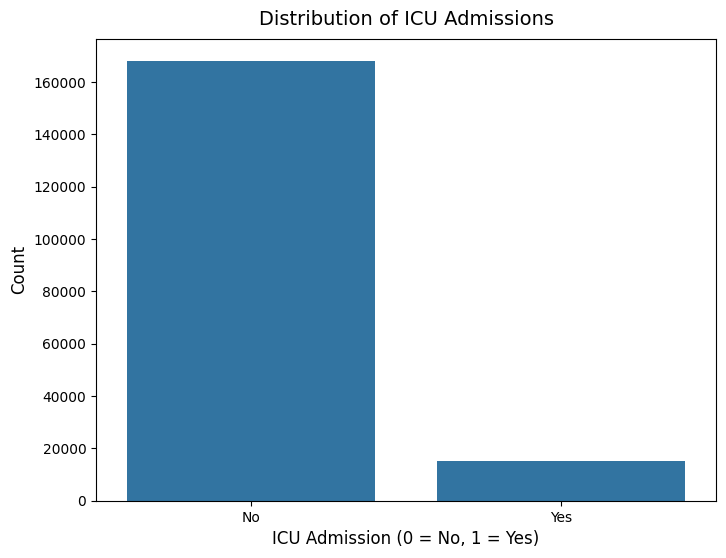

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='ICU', data = df)
plt.title('Distribution of ICU Admissions', fontsize=14, pad=10)
plt.xlabel('ICU Admission (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

### **Step 3: Plot the count of ICU cases against age**

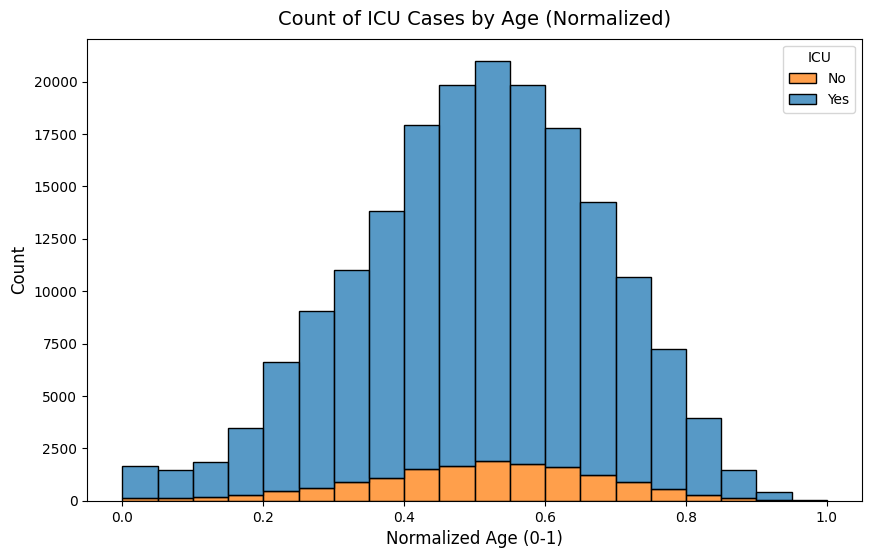

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='AGE', hue='ICU', multiple='stack', bins=20)
plt.title('Count of ICU Cases by Age (Normalized)', fontsize=14, pad=10)
plt.xlabel('Normalized Age (0-1)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='ICU', labels=['No', 'Yes'])
plt.show()

### **Step 4: Plot count of ICU against 'CLASIFFICATION_FINAL'**

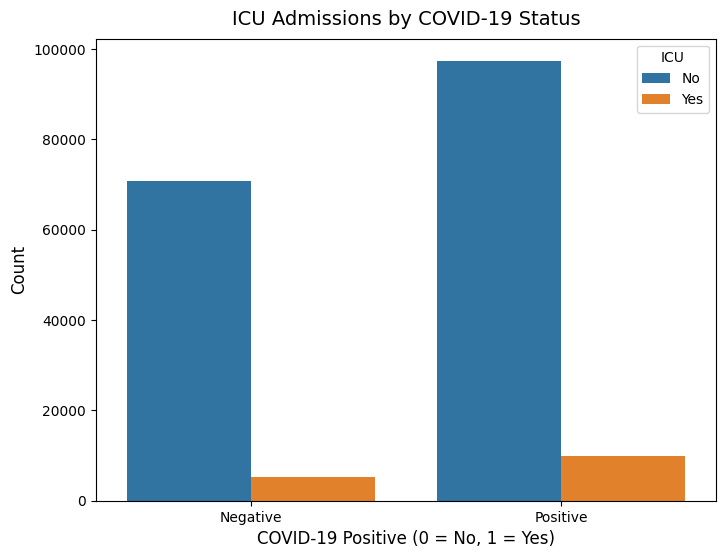

In [17]:
# Since 'CLASIFFICATION_FINAL' was dropped, use 'COVID_POSITIVE' as a proxy
plt.figure(figsize=(8, 6))
sns.countplot(x='COVID_POSITIVE', hue='ICU', data=df)
plt.title('ICU Admissions by COVID-19 Status', fontsize=14, pad=10)
plt.xlabel('COVID-19 Positive (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='ICU', labels=['No', 'Yes'])
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

### **Step 6: Scatter matrix plot**

<Figure size 1200x1000 with 0 Axes>

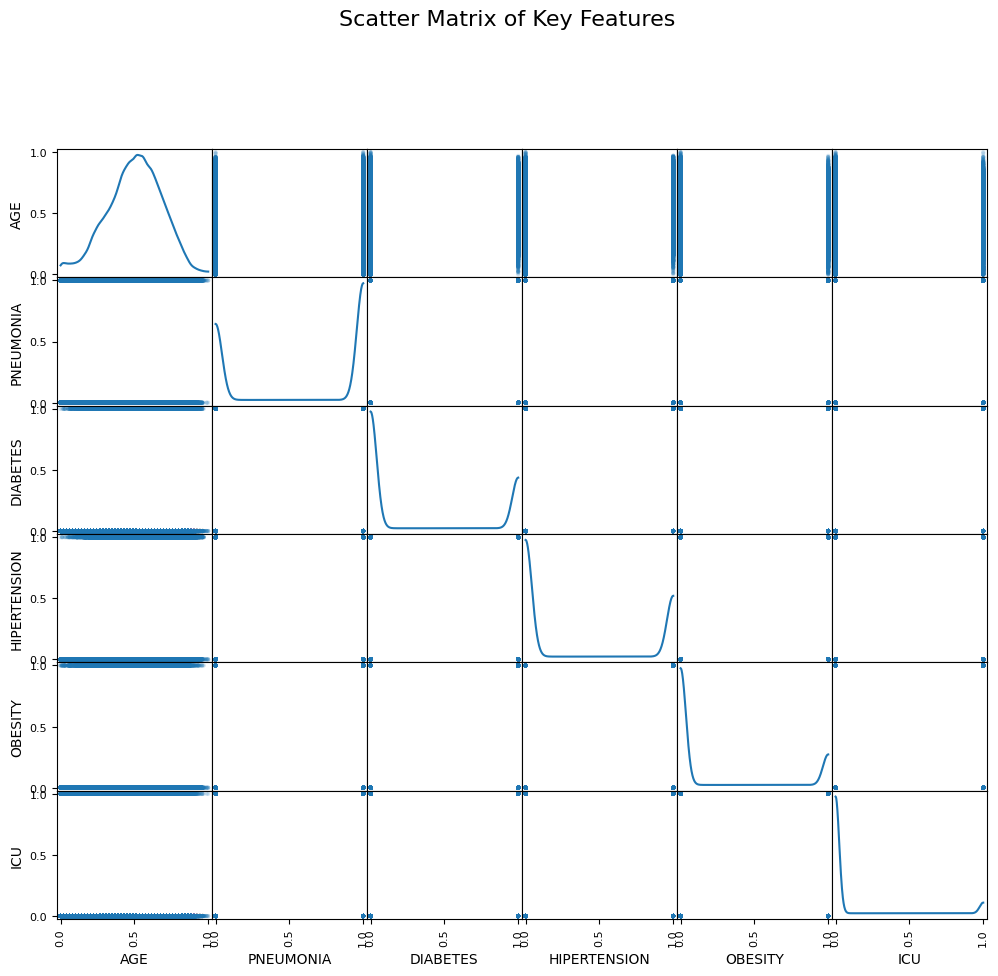

In [18]:
# Selecting key features for scatter matrix
features = ['AGE', 'PNEUMONIA', 'DIABETES', 'HIPERTENSION', 'OBESITY', 'ICU']
plt.figure(figsize=(12, 10))
scatter_matrix(df[features], alpha=0.2, figsize=(12, 10), diagonal='kde')
plt.suptitle('Scatter Matrix of Key Features', fontsize=16, y=1.02)
plt.show()

### **Step 7: Plots of Correlation Matrix**

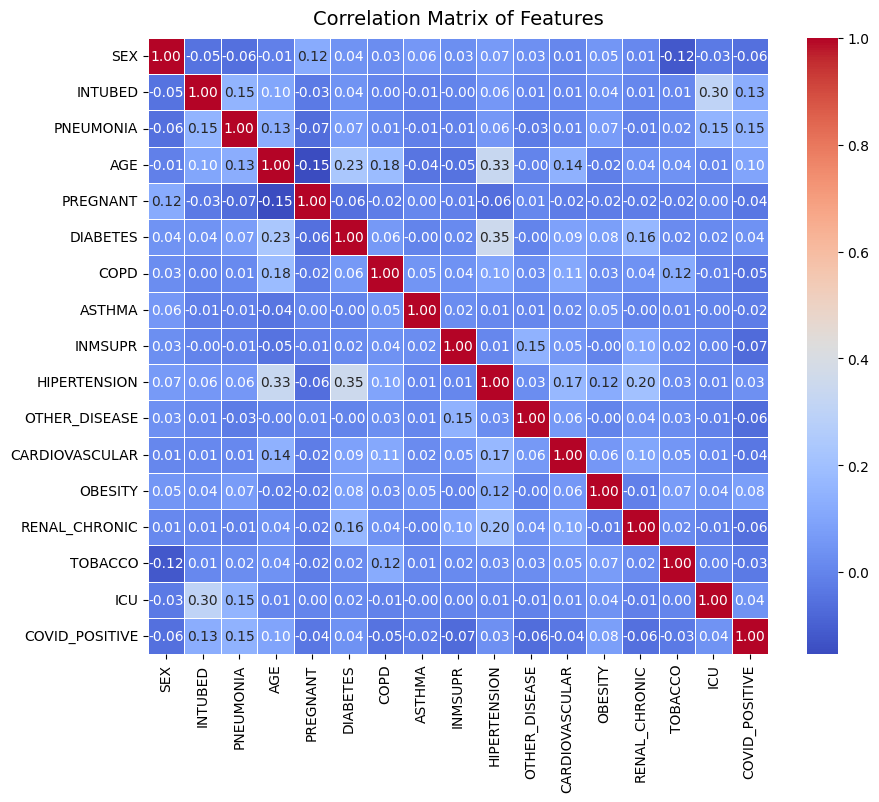

In [19]:
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features', fontsize=14, pad=10)
plt.show()

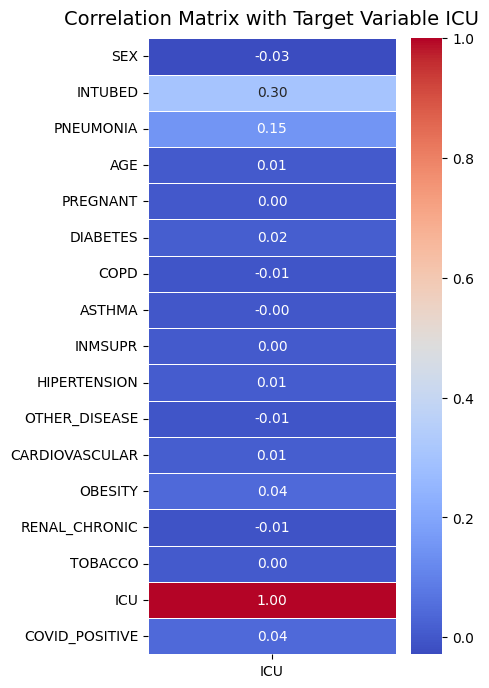

In [20]:
plt.figure(figsize=(4, 8))
correlation_with_icu = df.corr()[['ICU']]
sns.heatmap(correlation_with_icu, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix with Target Variable ICU', fontsize=14, pad=10)
plt.show()

### **Step 8: Additional plots for deeper understanding**

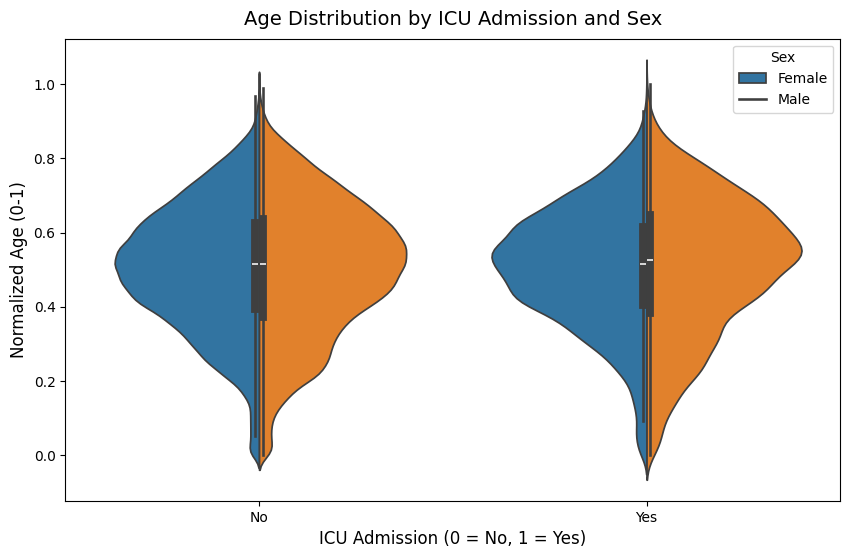

In [21]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='ICU', y='AGE', hue='SEX', split=True, data=df)
plt.title('Age Distribution by ICU Admission and Sex', fontsize=14, pad=10)
plt.xlabel('ICU Admission (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Normalized Age (0-1)', fontsize=12)
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.show()

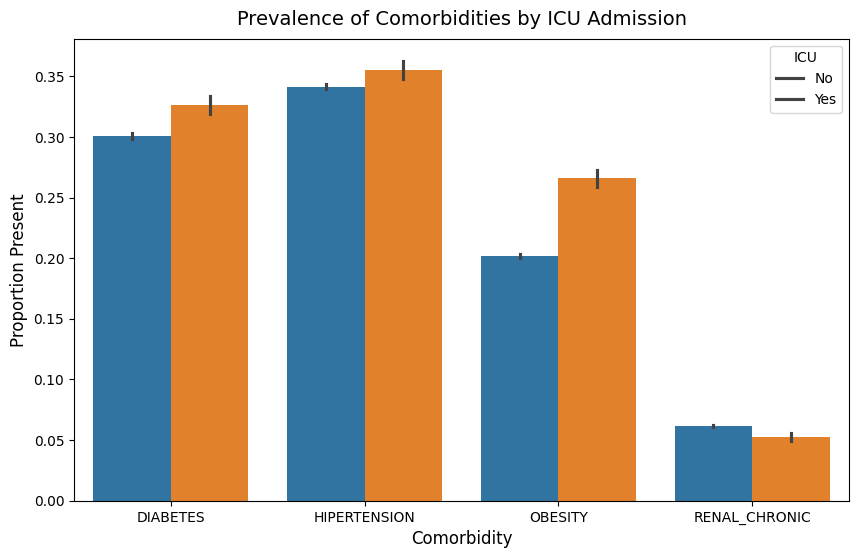

In [22]:
comorbidities = ['DIABETES', 'HIPERTENSION', 'OBESITY', 'RENAL_CHRONIC']
comorb_df = df[comorbidities + ['ICU']].melt(id_vars=['ICU'], var_name='Comorbidity', value_name='Present')
plt.figure(figsize=(10, 6))
sns.barplot(x='Comorbidity', y='Present', hue='ICU', data=comorb_df)
plt.title('Prevalence of Comorbidities by ICU Admission', fontsize=14, pad=10)
plt.xlabel('Comorbidity', fontsize=12)
plt.ylabel('Proportion Present', fontsize=12)
plt.legend(title='ICU', labels=['No', 'Yes'])
plt.show()

## **Task 2: Model Building**

### **Step 1 : Import Libraries**

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

### **Step 2 : Set random seed for reproducibility**

In [24]:
np.random.seed(42)

### **Step 3: Select predictors that impact ICU prediction**

In [25]:
# Choosing features based on domain knowledge and correlation analysis
predictors = ['AGE', 'PNEUMONIA', 'DIABETES', 'HIPERTENSION', 'OBESITY',
              'RENAL_CHRONIC', 'COVID_POSITIVE', 'SEX']
X = df[predictors]
y = df['ICU']

### **Step 4: Build and evaluate the first linear model (Logistic Regression)**

In [26]:

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing and train the model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = model.predict(X_test_scaled)

# Cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print("Step 4: Cross-validation ROC-AUC scores:", cv_scores)
print("Step 4: Mean CV ROC-AUC:", cv_scores.mean(), "±", cv_scores.std())

Step 4: Cross-validation ROC-AUC scores: [0.64799595 0.65670367 0.65841793 0.66437124 0.65875362]
Step 4: Mean CV ROC-AUC: 0.6572484818951526 ± 0.005296657288687434


### **Step 5 : Evaluate with multiple metrics**

In [27]:
# Evaluating with multiple metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])

print("\nStep 5: Initial Model Performance Metrics (Imbalanced Data):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")


Step 5: Initial Model Performance Metrics (Imbalanced Data):
Accuracy: 0.9164
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
ROC-AUC: 0.6632


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### **Step 6: Balance the data using SMOTE and retrain the model**

In [28]:

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Retraining the model with balanced data
model_balanced = LogisticRegression(max_iter=1000, random_state=42)
model_balanced.fit(X_train_balanced, y_train_balanced)

# Predicting on test set with balanced model
y_pred_balanced = model_balanced.predict(X_test_scaled)

# Evaluating balanced model
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
precision_balanced = precision_score(y_test, y_pred_balanced)
recall_balanced = recall_score(y_test, y_pred_balanced)
f1_balanced = f1_score(y_test, y_pred_balanced)
roc_auc_balanced = roc_auc_score(y_test, model_balanced.predict_proba(X_test_scaled)[:, 1])

print("\nStep 6: Balanced Model Performance Metrics:")
print(f"Accuracy: {accuracy_balanced:.4f}")
print(f"Precision: {precision_balanced:.4f}")
print(f"Recall: {recall_balanced:.4f}")
print(f"F1-Score: {f1_balanced:.4f}")
print(f"ROC-AUC: {roc_auc_balanced:.4f}")


Step 6: Balanced Model Performance Metrics:
Accuracy: 0.4587
Precision: 0.1182
Recall: 0.8480
F1-Score: 0.2075
ROC-AUC: 0.6639


### **Step 7: Visualization: Confusion Matrix for Model Evaluation**

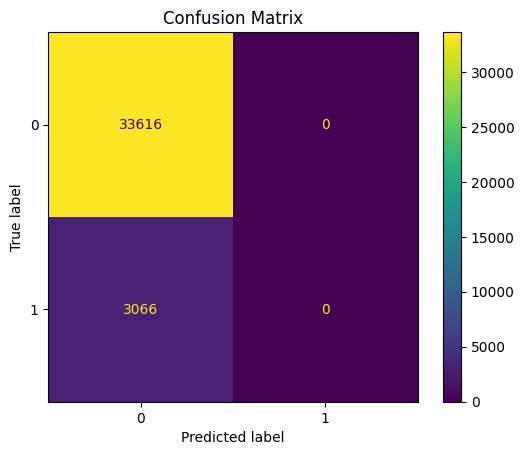

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()


### **Step 8: Visualize ROC curve for comparison**

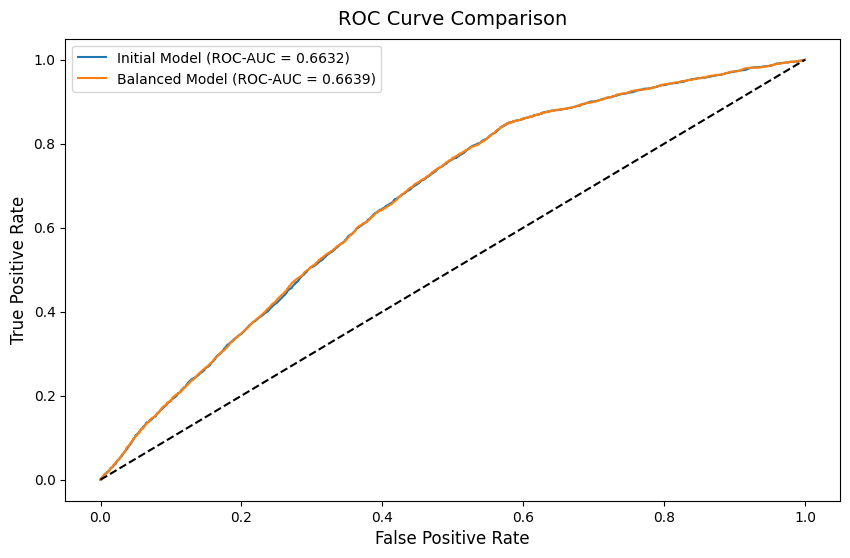

In [30]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
fpr_bal, tpr_bal, _ = roc_curve(y_test, model_balanced.predict_proba(X_test_scaled)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Initial Model (ROC-AUC = {:.4f})'.format(roc_auc))
plt.plot(fpr_bal, tpr_bal, label='Balanced Model (ROC-AUC = {:.4f})'.format(roc_auc_balanced))
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison', fontsize=14, pad=10)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend()
plt.show()

# **Part 2: Improved Model, Clustering & Balanced Classification**

## **Step 1: Import Libraries and Start Spark Session**

In [31]:
# Importing required libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml import Pipeline
from pyspark.ml.feature import Imputer, StringIndexer, VectorAssembler, StandardScaler, PCA
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator, ClusteringEvaluator

# Python plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Start Spark session
spark = SparkSession.builder.appName("ImprovedModel_Part2").getOrCreate()


## **Step 2: Load Dataset and Clean Column Names**

In [32]:
# Load and clean data
df = spark.read.csv("Dataset.csv", header=True, inferSchema=True)
df = df.toDF(*[c.strip() for c in df.columns])  # Clean column names
df = df.withColumn("target", col("CLASIFFICATION_FINAL").cast("int"))  # Convert target column


## **Step 3: Identify, Impute and Prepare Features**

In [33]:
numeric_cols = [c for c in df.columns if df.select(c).schema.fields[0].dataType.simpleString() in ['int', 'double'] and c != "target"]
categorical_cols = [c for c in df.columns if df.select(c).schema.fields[0].dataType.simpleString() == 'string']

# Defining feature steps
imputer = Imputer(inputCols=numeric_cols, outputCols=[f"{c}_imputed" for c in numeric_cols])
indexers = [StringIndexer(inputCol=c, outputCol=f"{c}_indexed", handleInvalid='keep') for c in categorical_cols]
feature_cols = [f"{c}_imputed" for c in numeric_cols] + [f"{c}_indexed" for c in categorical_cols]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="assembled_features")
scaler = StandardScaler(inputCol="assembled_features", outputCol="features")


## **Step 4: Train Global Classification Model**

In [34]:
train_df, test_df = df.randomSplit([0.8, 0.2], seed=42)
rf = RandomForestClassifier(labelCol="target", featuresCol="features", numTrees=100)
global_pipeline = Pipeline(stages=indexers + [imputer, assembler, scaler, rf])
global_model = global_pipeline.fit(train_df)
global_predictions = global_model.transform(test_df)


## **Step 5: Evaluate Global Model (Accuracy, F1, Precision, Recall)**

In [35]:
metrics = {
    "accuracy": "accuracy",
    "f1_score": "f1",
    "weighted_precision": "weightedPrecision",
    "weighted_recall": "weightedRecall"
}

global_scores = {}
print("Global Model Metrics:")
for name, metric in metrics.items():
    evaluator = MulticlassClassificationEvaluator(labelCol="target", predictionCol="prediction", metricName=metric)

    score = evaluator.evaluate(global_predictions)
    global_scores[name] = score
    print(f"{name.title()}: {score:.4f}")


Global Model Metrics:
Accuracy: 0.9490
F1_Score: 0.9287
Weighted_Precision: 0.9292
Weighted_Recall: 0.9490


## **Step 6: Visualize Feature Importances and Confusion Matrix**

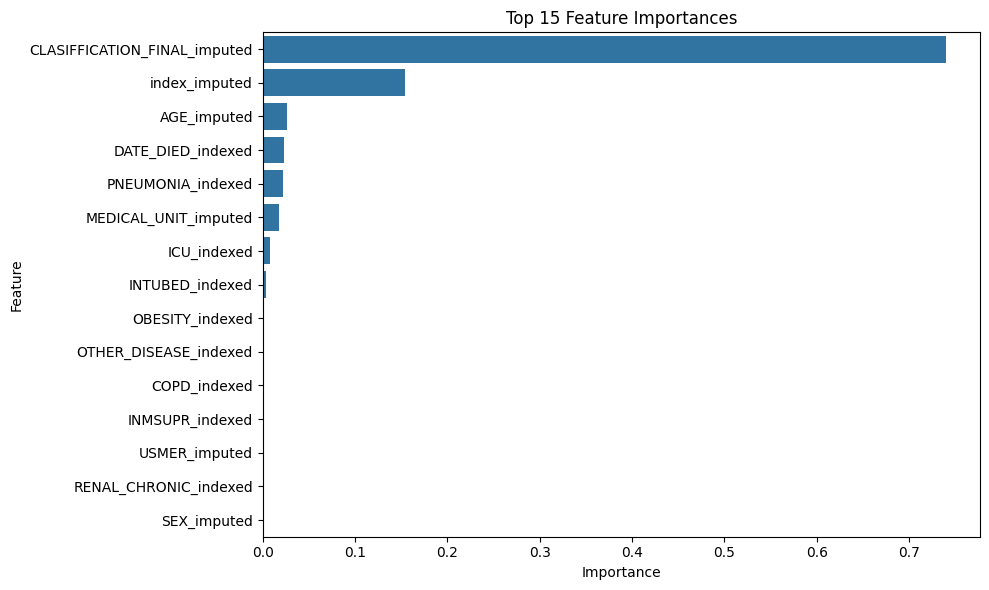

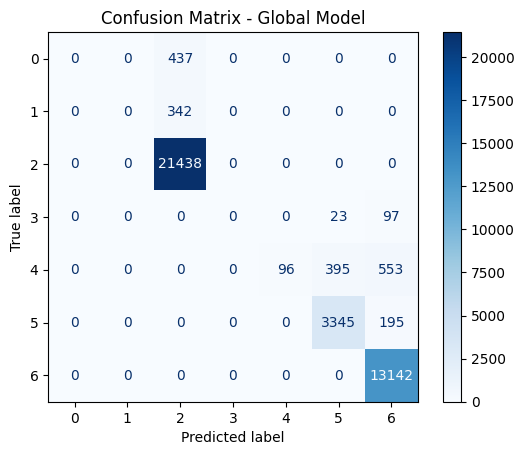

In [36]:
# Feature importance
features = feature_cols
importances = global_model.stages[-1].featureImportances.toArray()
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=importance_df.head(15), x='Importance', y='Feature')
plt.title("Top 15 Feature Importances")
plt.tight_layout()
plt.show()

# Confusion matrix
conf_df = global_predictions.select("target", "prediction").toPandas()
cm = confusion_matrix(conf_df["target"], conf_df["prediction"])
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title("Confusion Matrix - Global Model")
plt.show()


## **Step 7: Cluster Data Using KMeans**

In [37]:
# Step 7: Preparing full preprocessing pipeline
preprocess_pipeline = Pipeline(stages=indexers + [imputer, assembler, scaler])
preprocess_model = preprocess_pipeline.fit(df)
processed_df = preprocess_model.transform(df)

# Applying KMeans clustering on scaled features
kmeans = KMeans(k=5, seed=1, featuresCol="features", predictionCol="cluster")
kmeans_model = kmeans.fit(processed_df)
clustered_df = kmeans_model.transform(processed_df)

# Reducing dimensionality with PCA for visualization
pca = PCA(k=2, inputCol="features", outputCol="pcaFeatures")
pca_model = pca.fit(clustered_df)
pca_result = pca_model.transform(clustered_df)

# Convert for plotting
pdf = pca_result.select("pcaFeatures", "cluster", "target").toPandas()
pdf[['x', 'y']] = pd.DataFrame(pdf['pcaFeatures'].tolist(), index=pdf.index)



## **Step 8: Box Plot and Scatter Plot Visualization with PCA**

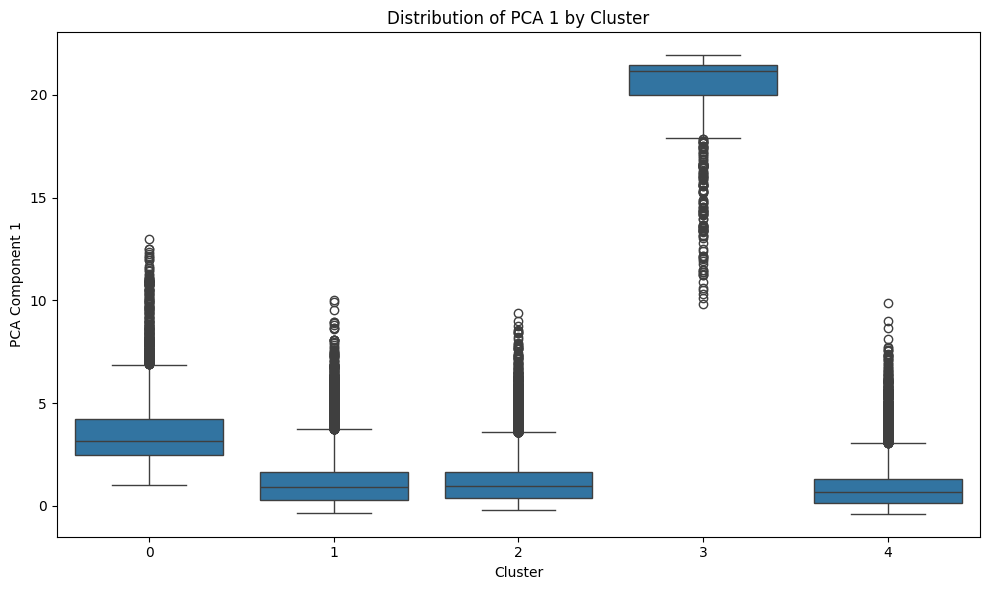

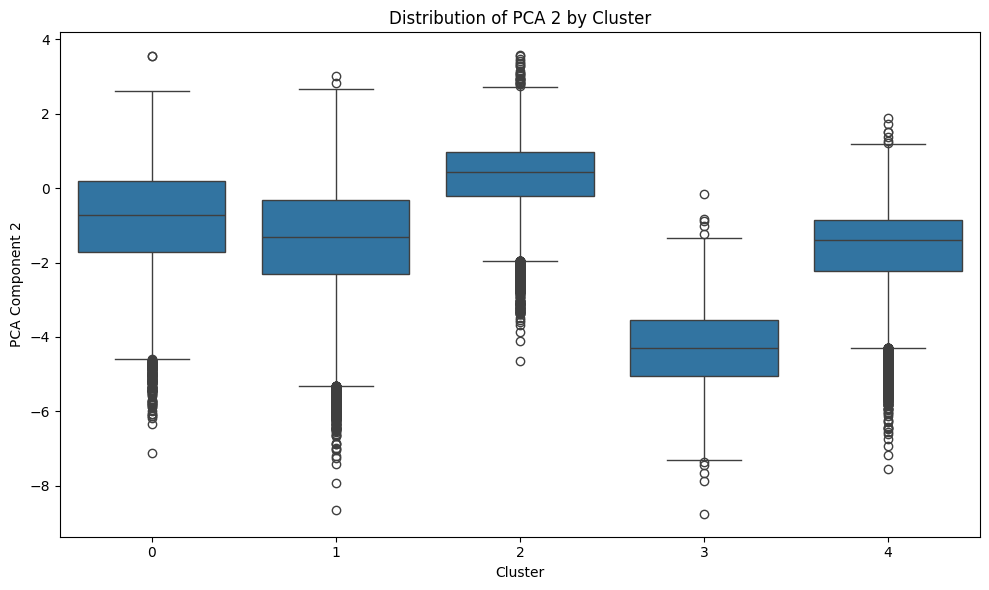

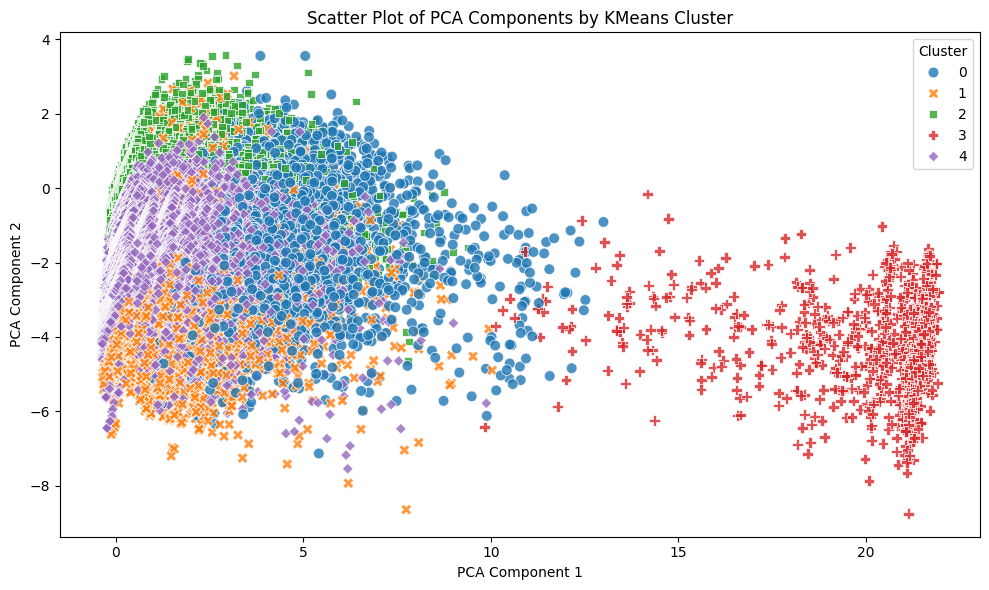

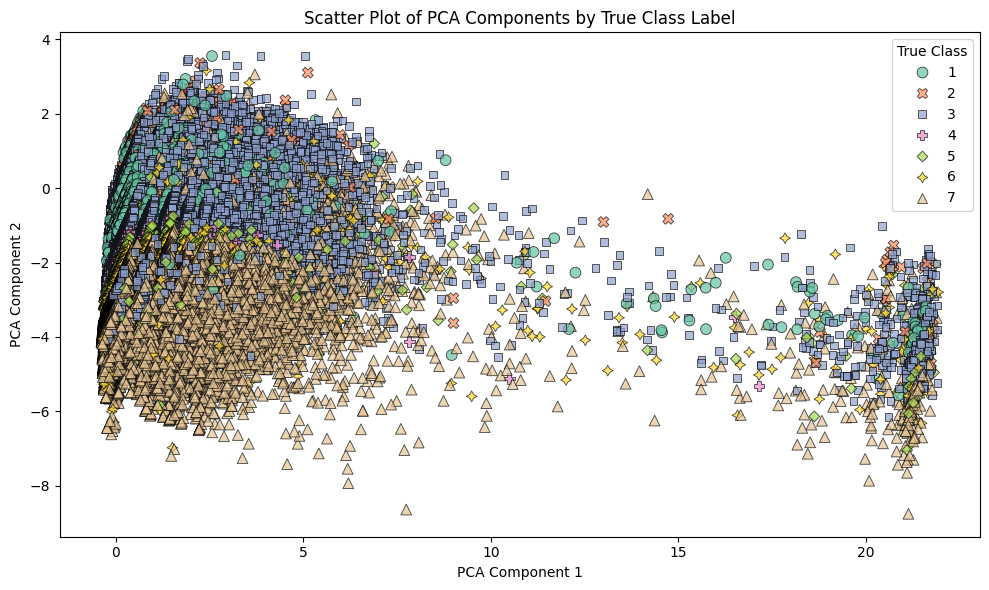

In [38]:
# Plotting clusters
import seaborn as sns
import matplotlib.pyplot as plt

# PCA 1 distribution by Cluster
plt.figure(figsize=(10,6))
sns.boxplot(data=pdf, x='cluster', y='x')
plt.title("Distribution of PCA 1 by Cluster")
plt.xlabel("Cluster")
plt.ylabel("PCA Component 1")
plt.tight_layout()
plt.show()

# PCA 2 distribution by Cluster
plt.figure(figsize=(10,6))
sns.boxplot(data=pdf, x='cluster', y='y')
plt.title("Distribution of PCA 2 by Cluster")
plt.xlabel("Cluster")
plt.ylabel("PCA Component 2")
plt.tight_layout()
plt.show()

# Scatter plot of PCA-reduced features by cluster
plt.figure(figsize=(10,6))
sns.scatterplot(data=pdf, x='x', y='y', hue='cluster', style='cluster', palette='tab10', s=60, edgecolor='w', alpha=0.8)
plt.title("Scatter Plot of PCA Components by KMeans Cluster")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", loc="best")
plt.tight_layout()
plt.show()

# Scatter plot of PCA-reduced features by true labels
plt.figure(figsize=(10,6))
sns.scatterplot(data=pdf, x='x', y='y', hue='target', style='target', palette='Set2', s=60, edgecolor='k', alpha=0.7)
plt.title("Scatter Plot of PCA Components by True Class Label")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="True Class", loc="best")
plt.tight_layout()
plt.show()



## **Step 9: Train Local Classifiers per Cluster and Compare**


Local Classifier Metrics (Per Cluster):
Cluster | Accuracy |   F1    | Precision | Recall
--------------------------------------------------------------
   0    |  0.9610  | 0.9487 | 0.9445  | 0.9610
   1    |  0.9608  | 0.9468 | 0.9399  | 0.9608
   2    |  0.9624  | 0.9462 | 0.9460  | 0.9624
   3    |  0.9516  | 0.9442 | 0.9549  | 0.9516
   4    |  0.9517  | 0.9348 | 0.9428  | 0.9517


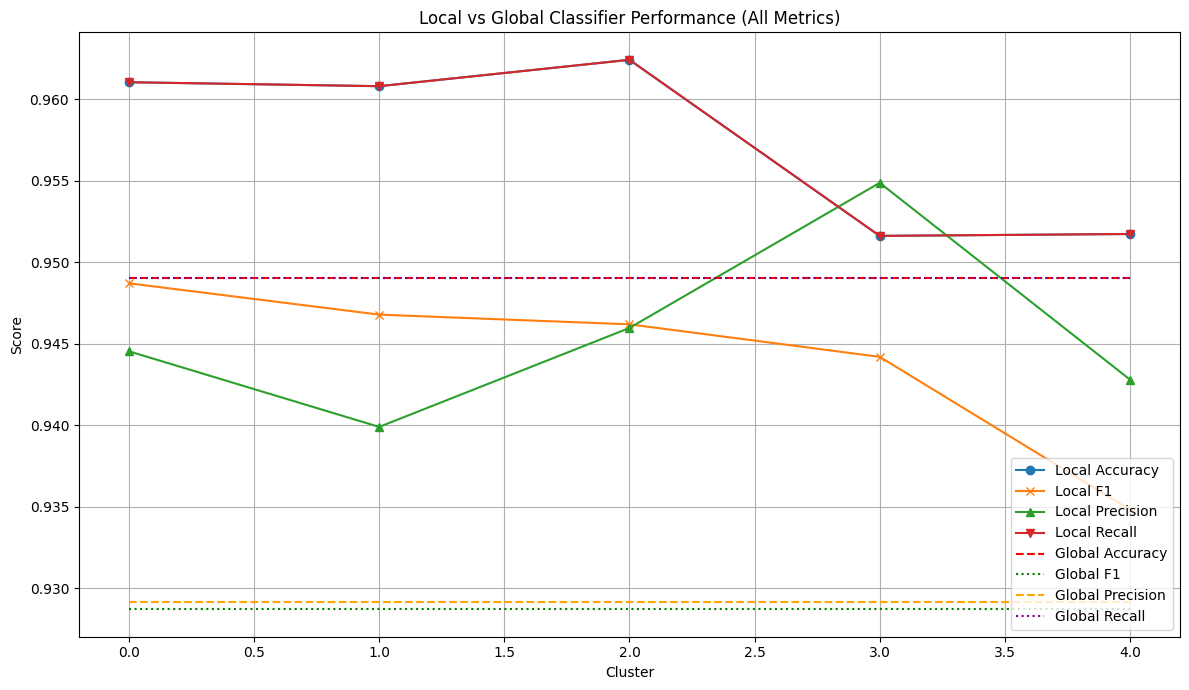

In [39]:
local_metrics = []
print("\nLocal Classifier Metrics (Per Cluster):")
print("Cluster | Accuracy |   F1    | Precision | Recall")
print("--------------------------------------------------------------")

for i in range(kmeans.getK()):
    c_data = clustered_df.filter(col("cluster") == i)
    train_c, test_c = c_data.randomSplit([0.8, 0.2], seed=42)
    model_c = RandomForestClassifier(labelCol="target", featuresCol="features").fit(train_c)
    preds_c = model_c.transform(test_c)
    acc = MulticlassClassificationEvaluator(labelCol="target", predictionCol="prediction", metricName="accuracy").evaluate(preds_c)
    f1 = MulticlassClassificationEvaluator(labelCol="target", predictionCol="prediction", metricName="f1").evaluate(preds_c)
    precision = MulticlassClassificationEvaluator(labelCol="target", predictionCol="prediction", metricName="weightedPrecision").evaluate(preds_c)
    recall = MulticlassClassificationEvaluator(labelCol="target", predictionCol="prediction", metricName="weightedRecall").evaluate(preds_c)
    print(f"   {i}    |  {acc:.4f}  | {f1:.4f} | {precision:.4f}  | {recall:.4f}")

    local_metrics.append({'Cluster': i, 'Accuracy': acc, 'F1': f1, 'Precision': precision, 'Recall': recall})


# Converting local metrics to DataFrame
local_df = pd.DataFrame(local_metrics)

# Plot of local classifier metrics
plt.figure(figsize=(12, 7))
plt.plot(local_df['Cluster'], local_df['Accuracy'], marker='o', label='Local Accuracy')
plt.plot(local_df['Cluster'], local_df['F1'], marker='x', label='Local F1')
plt.plot(local_df['Cluster'], local_df['Precision'], marker='^', label='Local Precision')
plt.plot(local_df['Cluster'], local_df['Recall'], marker='v', label='Local Recall')

# Adding global model reference lines
plt.hlines(global_scores['accuracy'], 0, 4, colors='red', linestyles='dashed', label='Global Accuracy')
plt.hlines(global_scores['f1_score'], 0, 4, colors='green', linestyles='dotted', label='Global F1')
plt.hlines(global_scores['weighted_precision'], 0, 4, colors='orange', linestyles='dashed', label='Global Precision')
plt.hlines(global_scores['weighted_recall'], 0, 4, colors='purple', linestyles='dotted', label='Global Recall')

# Plot formatting
plt.title("Local vs Global Classifier Performance (All Metrics)")
plt.xlabel("Cluster")
plt.ylabel("Score")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


## **Step 10: Balance the Dataset and Train Again**

In [40]:
# Undersampling each class to match minority
class_counts = df.groupBy("target").count().orderBy("count").collect()
min_count = class_counts[0]["count"]
balanced_parts = [df.filter(col("target") == row["target"]).sample(False, min_count / row["count"], seed=42) for row in class_counts]
df_balanced = balanced_parts[0]
for part in balanced_parts[1:]:
    df_balanced = df_balanced.union(part)

train_bal, test_bal = df_balanced.randomSplit([0.8, 0.2], seed=42)
rf_bal = RandomForestClassifier(labelCol="target", featuresCol="features", numTrees=100)
pipeline_bal = Pipeline(stages=indexers + [imputer, assembler, scaler, rf_bal])
model_bal = pipeline_bal.fit(train_bal)
predictions_bal = model_bal.transform(test_bal)

# Metrics for balanced model
print("\n Balanced Model Metrics:")
for name, metric in metrics.items():
    score = MulticlassClassificationEvaluator(labelCol="target", predictionCol="prediction", metricName=metric).evaluate(predictions_bal)
    print(f"{name.title()}: {score:.4f}")



 Balanced Model Metrics:
Accuracy: 0.9391
F1_Score: 0.9391
Weighted_Precision: 0.9426
Weighted_Recall: 0.9391
